
#The Complex Network Homework No. 1
Bahar Mahdavi - SN: 40152521337

## A. Call the Karate Club graph from the torch_geometric library and draw it.

In [1]:
import os
import torch
print("PyTorch has version {}".format(torch.__version__))

PyTorch has version 2.1.0+cu121


###The installation of PyTorch Geometric (PyG) on Colab
PyTorch Geometric is an extension library to the popular deep learning framework PyTorch, and consists of various methods and utilities to ease the implementation of Graph Neural Networks.
https://pytorch-geometric.readthedocs.io/en/latest/notes/installation.html

In [3]:
# Install torch geometric
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
!pip install -q torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.4 MB/s eta 0:00:00


###Loading dataset

In [2]:
# Load Zachary's karate club network
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
data = dataset[0]  # Get the first graph object.

###Graph visualization

In [3]:
# Helper function for visualization.
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

# Visualization function for NX graph or PyTorch tensor
def visualize(h, color, epoch=None, loss=None, accuracy=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set3")
        if epoch is not None and loss is not None and accuracy['train'] is not None and accuracy['val'] is not None:
            plt.xlabel((f'Epoch: {epoch}, Loss: {loss.item():.4f} \n'
                       f'Training Accuracy: {accuracy["train"]*100:.2f}% \n'
                       f' Validation Accuracy: {accuracy["val"]*100:.2f}%'),
                       fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set3")
    plt.show()

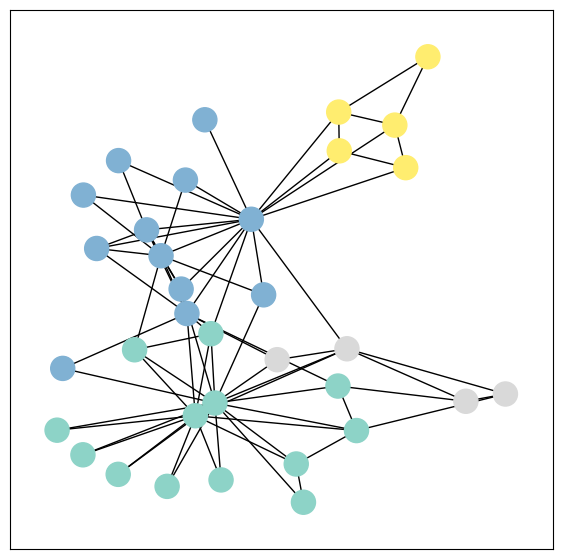

In [4]:
from torch_geometric.utils import to_networkx

G = nx.karate_club_graph()
G = to_networkx(data, to_undirected=True)
G.remove_edges_from(nx.selfloop_edges(G))

visualize(G, color=data.y)

## B. Print the graph properties (number of nodes and edges, list of nodes and edges, number of classes, label of nodes and display vector of nodes, and mask of training data)

In [8]:
print(f'Dataset: {dataset}:') #Zachary's karate club network containing 34 nodes, connected by 156 (undirected and unweighted) edges: This graph describes a social network of 34 members of a karate club and documents links between members who interacted outside the club
print('======================')
print(data)
print('==============================================================')
# Gather some statistics about the graph.
print(f'Number of graphs: {len(dataset)}') #this dataset holds exactly one graph
print(f'Number of features: {dataset.num_features}') #each node in this dataset is assigned a 34-dimensional feature vector (which uniquely describes the members of the karate club)

Dataset: KarateClub():
Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Number of graphs: 1
Number of features: 34


##Number of nodes and edges

In [9]:
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {(2*data.num_edges) / data.num_nodes:.2f}')

Number of nodes: 34
Number of edges: 156
Average node degree: 9.18


##Edge index

In [10]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

edge_index = data.edge_index
print(edge_index.t())

<IPython.core.display.Javascript object>

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

##Node index

In [11]:
for n in G.nodes:
     print(n , '-->', G.nodes[n])

0 --> {}
1 --> {}
2 --> {}
3 --> {}
4 --> {}
5 --> {}
6 --> {}
7 --> {}
8 --> {}
9 --> {}
10 --> {}
11 --> {}
12 --> {}
13 --> {}
14 --> {}
15 --> {}
16 --> {}
17 --> {}
18 --> {}
19 --> {}
20 --> {}
21 --> {}
22 --> {}
23 --> {}
24 --> {}
25 --> {}
26 --> {}
27 --> {}
28 --> {}
29 --> {}
30 --> {}
31 --> {}
32 --> {}
33 --> {}


##Number of classes

In [12]:
print(f'Number of classes: {dataset.num_classes}') #the graph holds exactly 4 classes, which represent the community each node belongs to

Number of classes: 4


##Define labels and display the graph

In [13]:
# there are two labels for nodes; Officer and Mr. Hi. we convert them into binary labels
G = nx.karate_club_graph()
labels = []
for i in G.nodes:
    club_names = G.nodes[i]['club']
    labels.append(1 if club_names== 'Officer' else 0)

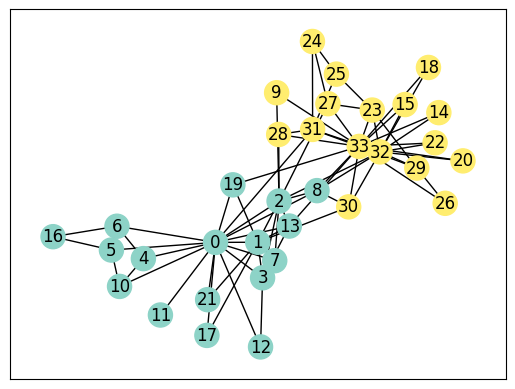

In [14]:
G.remove_edges_from(nx.selfloop_edges(G))
layout_pos = nx.spring_layout(G)
nx.draw_networkx(G, pos = layout_pos , node_color = labels, cmap = 'Set3')

##Mask of training data

In [15]:
print(f'Number of training nodes: {data.train_mask.sum()}') #mask of training data describes for which nodes we already know their community assigments
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')

Number of training nodes: 4
Training node label rate: 0.12


In [16]:
print(f'Contains isolated nodes: {data.has_isolated_nodes()}') #whether there exists isolated nodes in the graph (i.e. there exists no edge to any node)
print(f'Contains self-loops: {data.has_self_loops()}') #whether the graph contains self-loops
print(f'Is undirected: {data.is_undirected()}') #whether the graph is undirected

Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


## C. Train a network that includes graph convolutional layers and a classifier. So that use graph convolutional layers to obtain representation vectors of length 2 for the nodes (node embeddings) of the Karate Club graph. Then classify them with a classifier.

###Model architecture


In [5]:

from torch_geometric.utils import to_networkx
from torch.nn import Linear
from torch_geometric.nn import GCNConv
from sklearn.manifold import TSNE

class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(7531)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.
        out = self.classifier(h)# Apply a final (linear) classifier.

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


###Training the model

In [6]:
def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

In [7]:
# Lists to store loss and accuracy values
losses = []
accuracies = []
epochs = 500
criterion = torch.nn.CrossEntropyLoss()  #Initialize the CrossEntropyLoss function.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# Training loop
for epoch in range(epochs):
    loss, h = train(data)
    losses.append(loss.item())

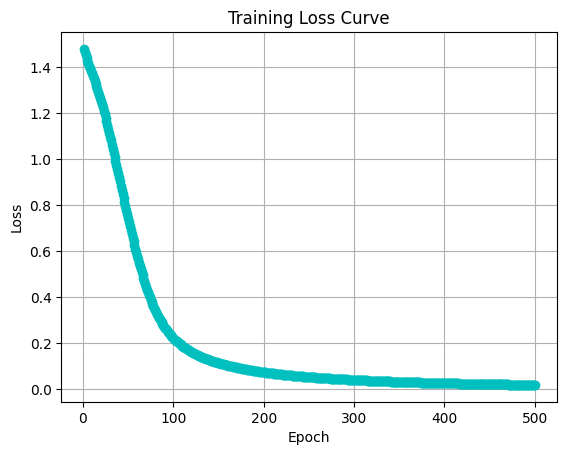

In [16]:
plt.plot(range(1, len(losses) + 1), losses, marker='o', color='c')

plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

###Visualizing node embeddings


<ipython-input-17-1cc2fa50d033>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c='c', cmap='Set3', s=50)


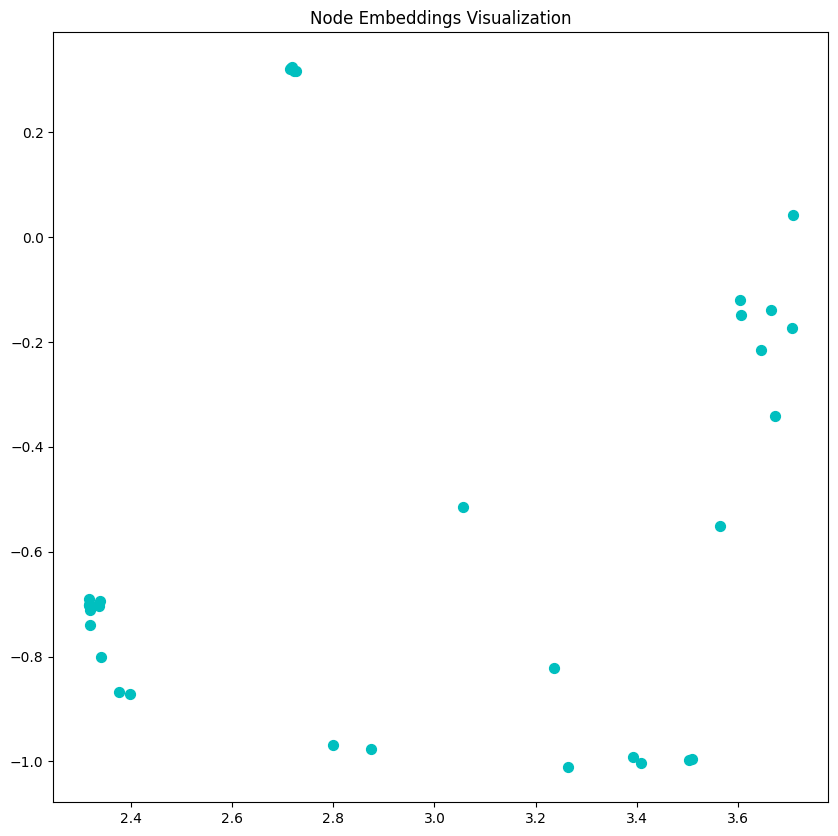

In [17]:
data = dataset[0]
out, embeddings = model(data.x, data.edge_index)

# Convert embeddings to a NumPy array
embeddings = embeddings.detach().numpy()

# Apply dimensionality reduction (e.g., t-SNE) for visualization
reduced_embeddings = TSNE(n_components=2).fit_transform(embeddings)

# Create a scatter plot to visualize the embeddings
plt.figure(figsize=(10, 10))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c='c', cmap='Set3', s=50)
plt.title("Node Embeddings Visualization")
plt.show()

Embedding shape: [34, 2]


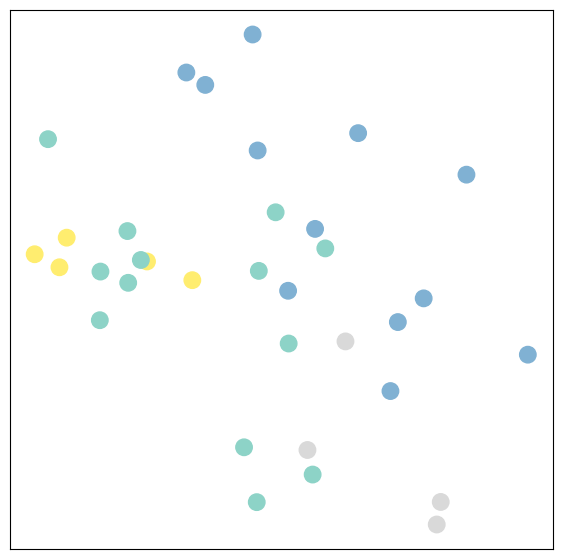

In [10]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize(h, color=data.y)

<IPython.core.display.Javascript object>

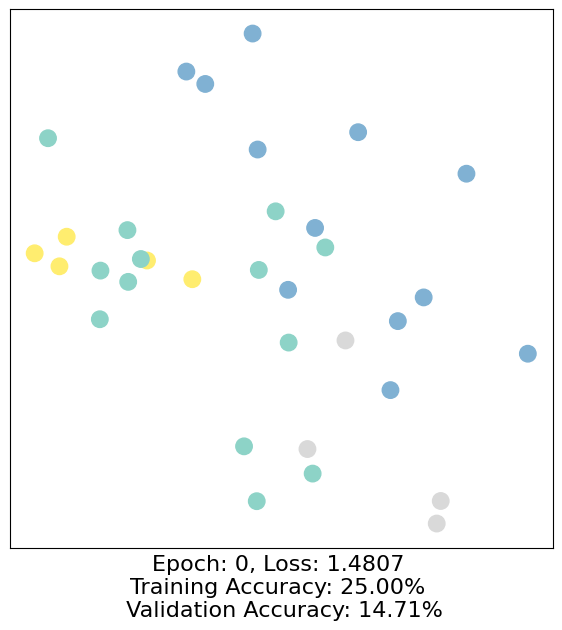

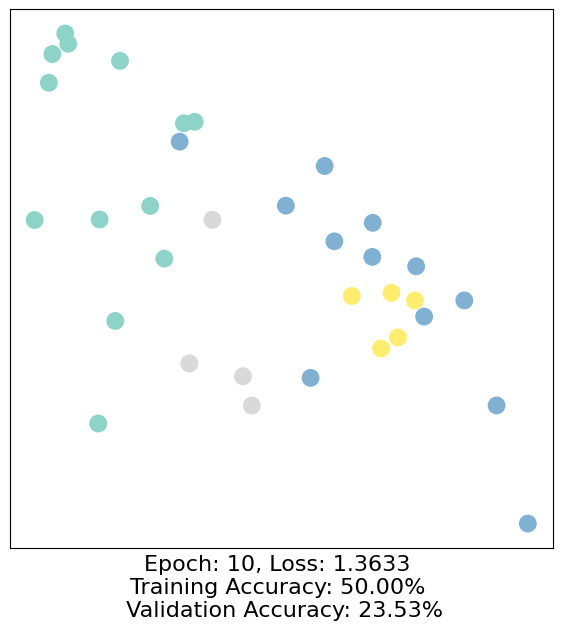

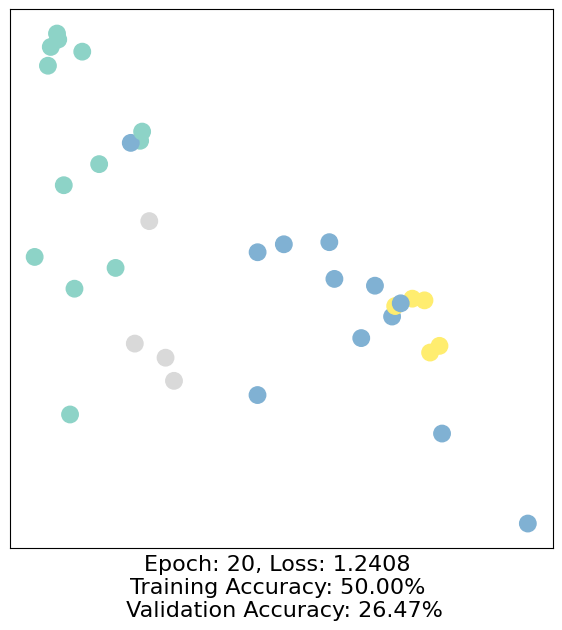

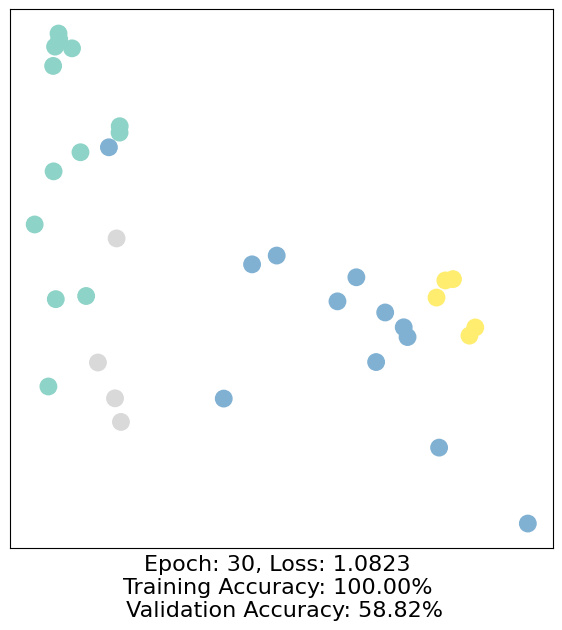

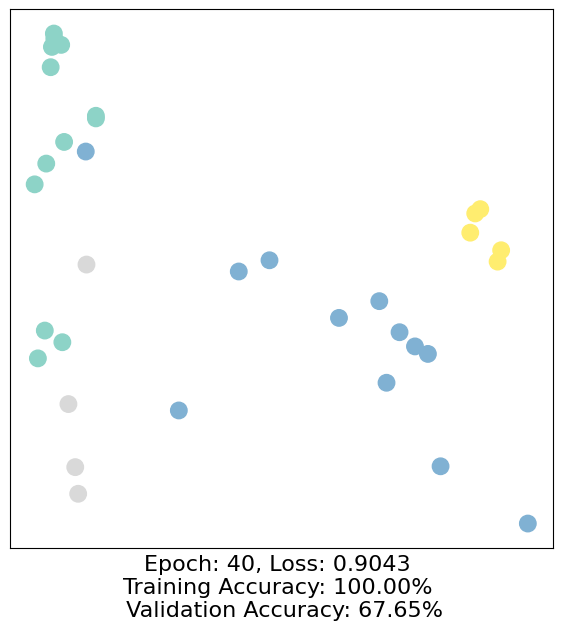

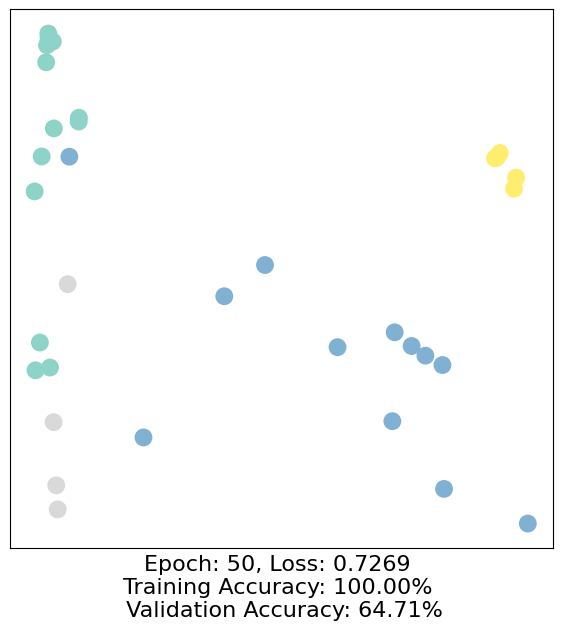

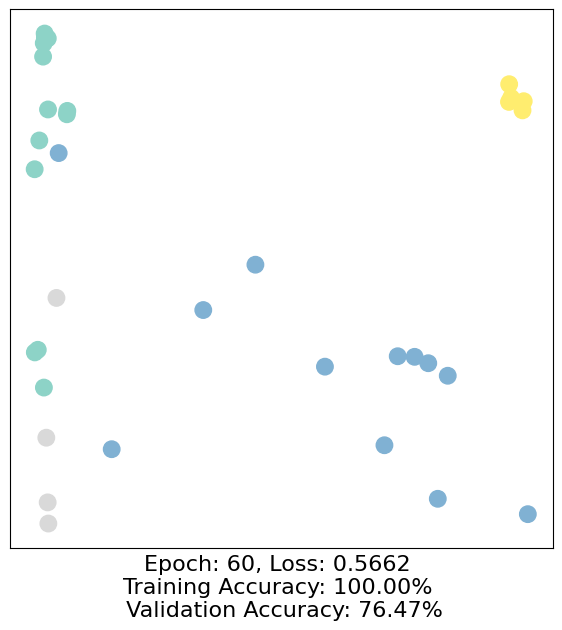

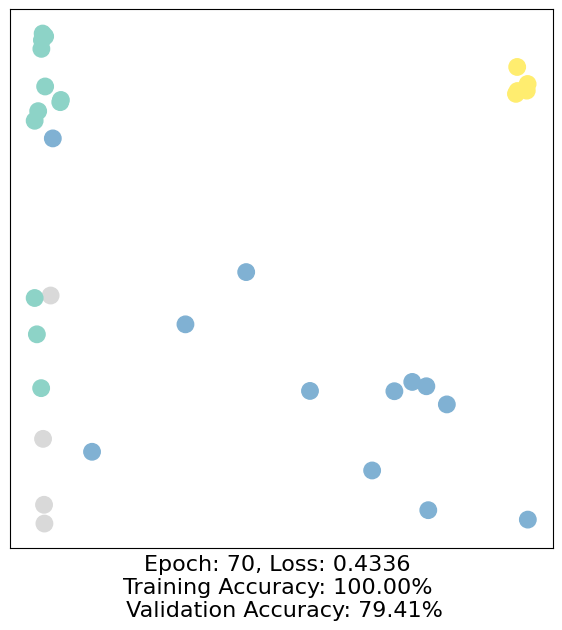

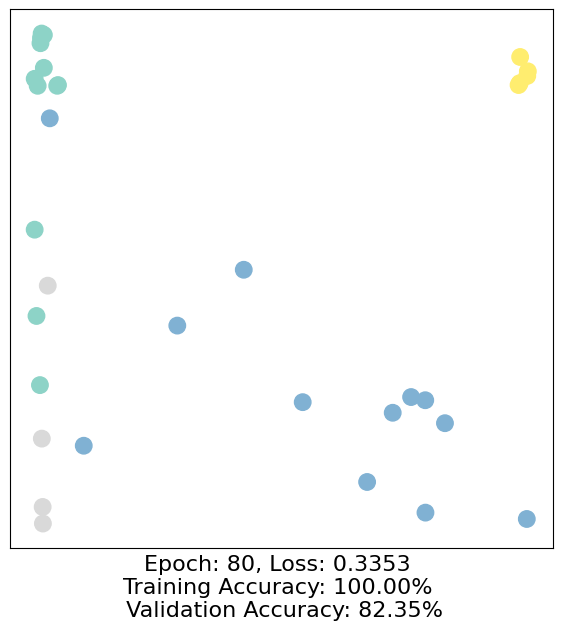

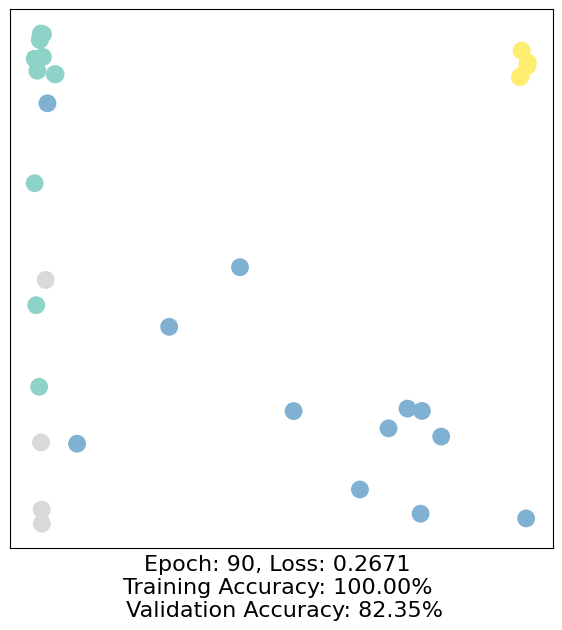

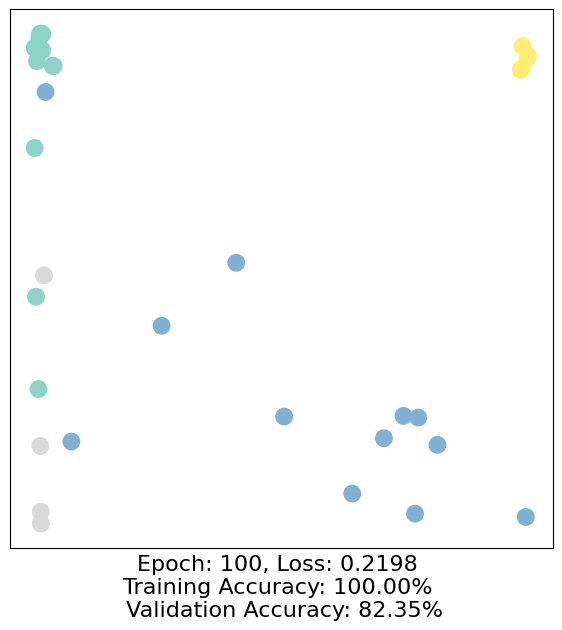

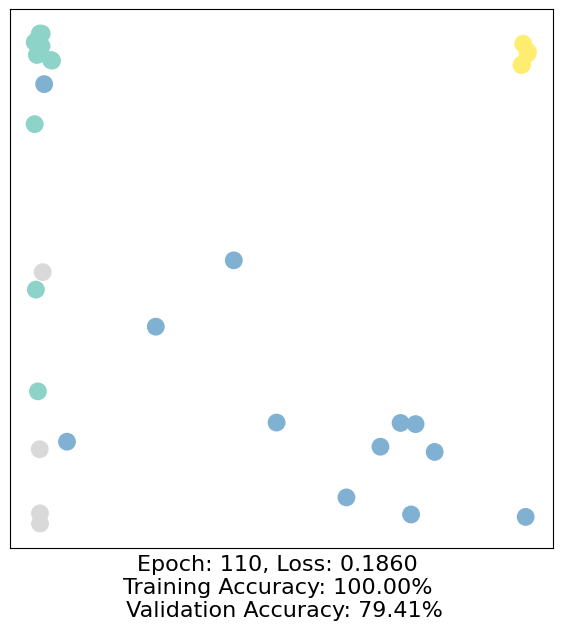

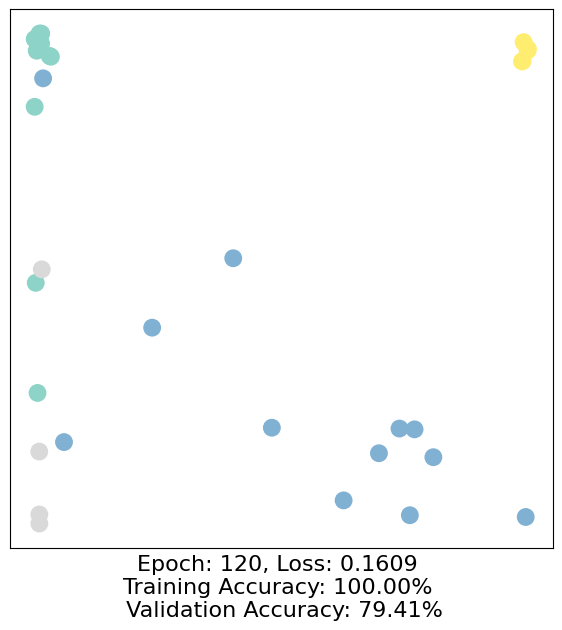

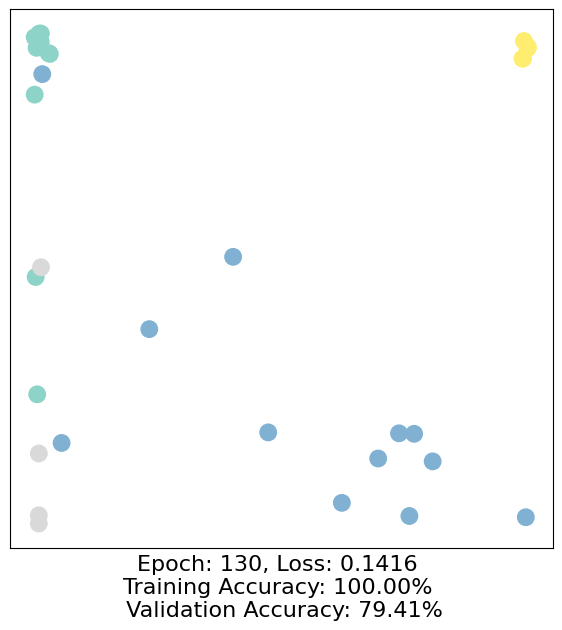

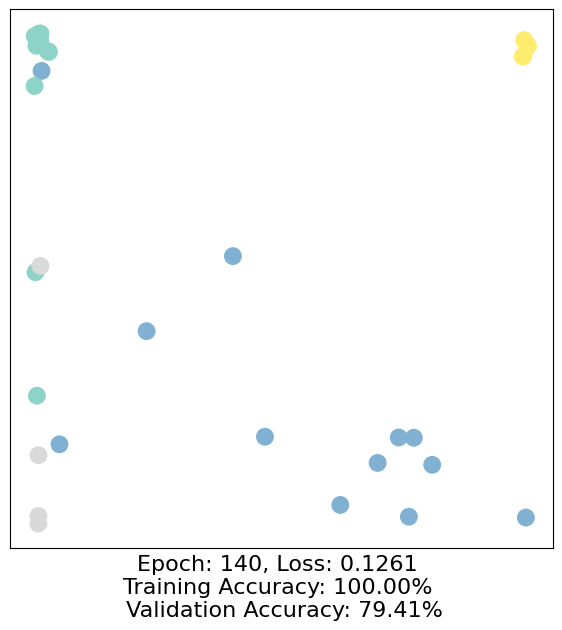

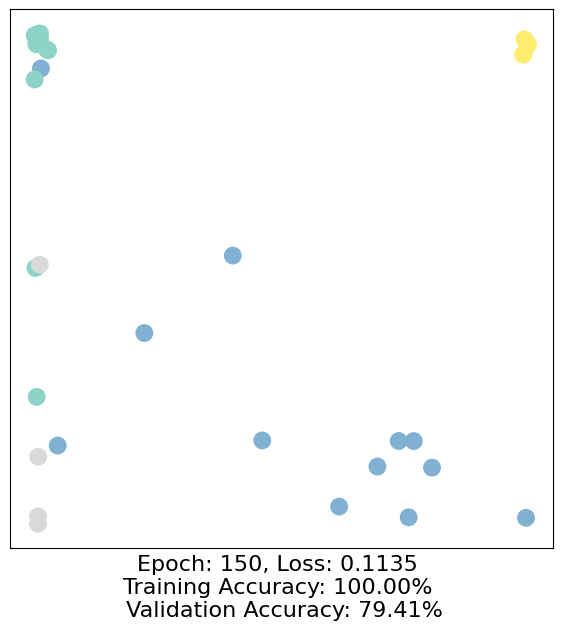

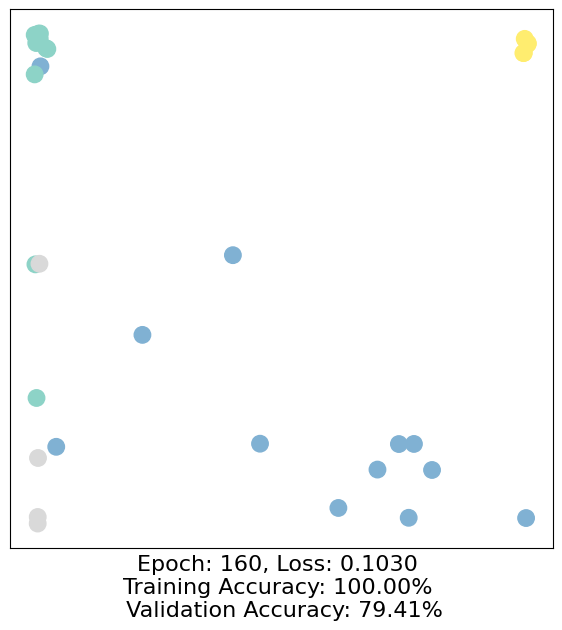

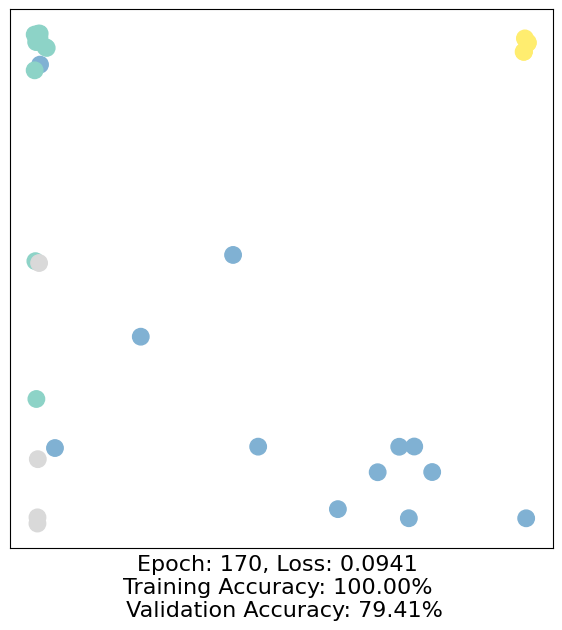

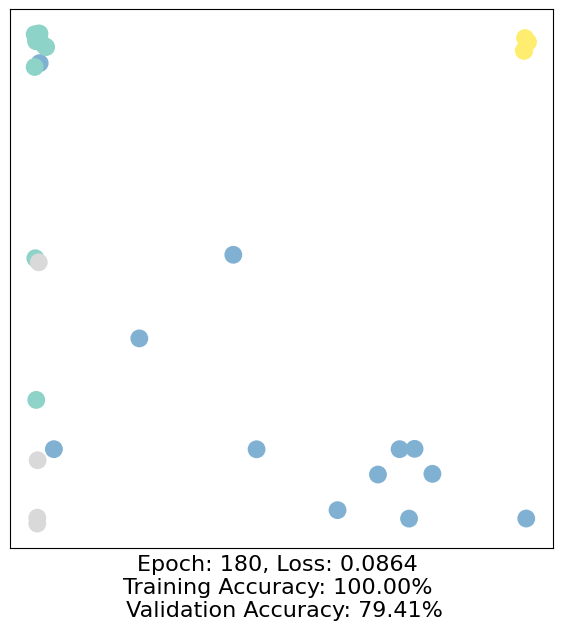

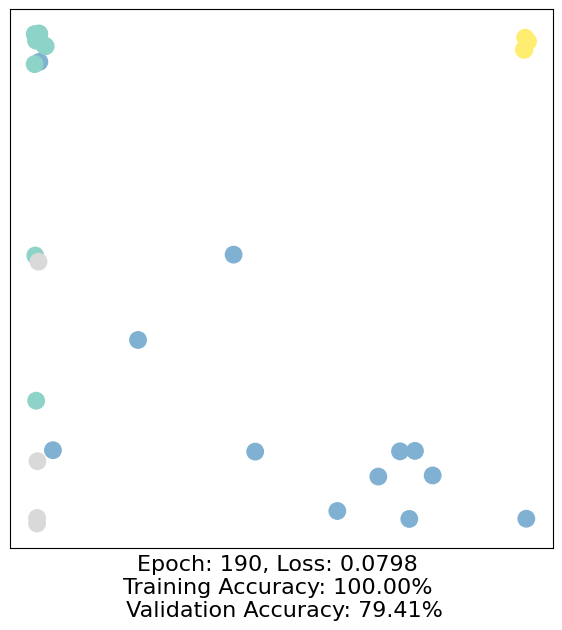

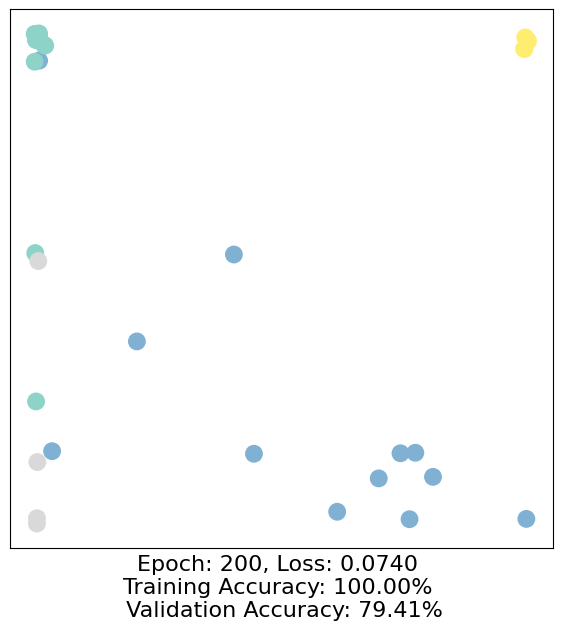

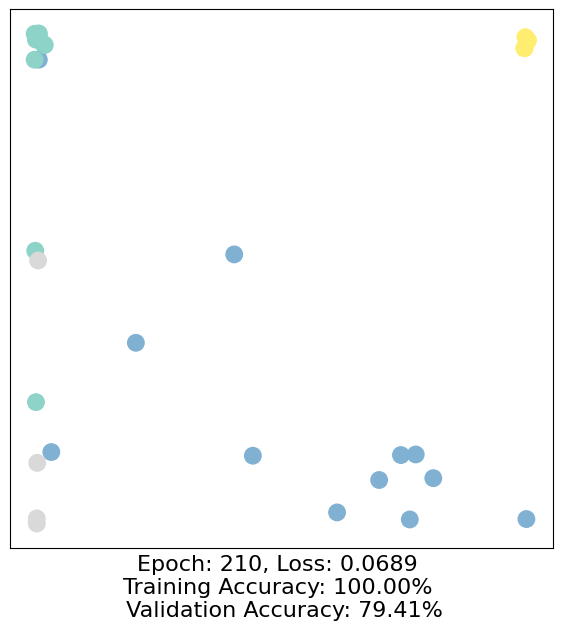

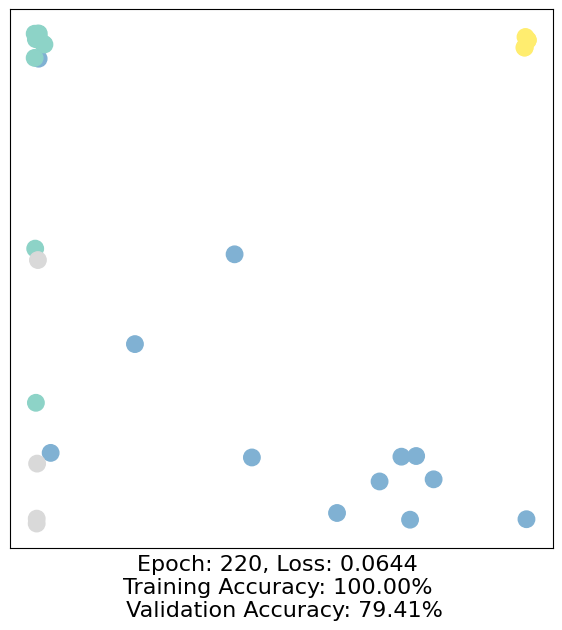

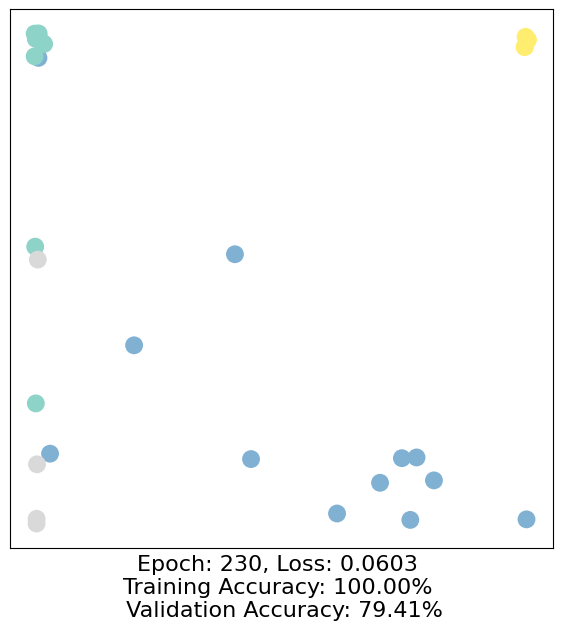

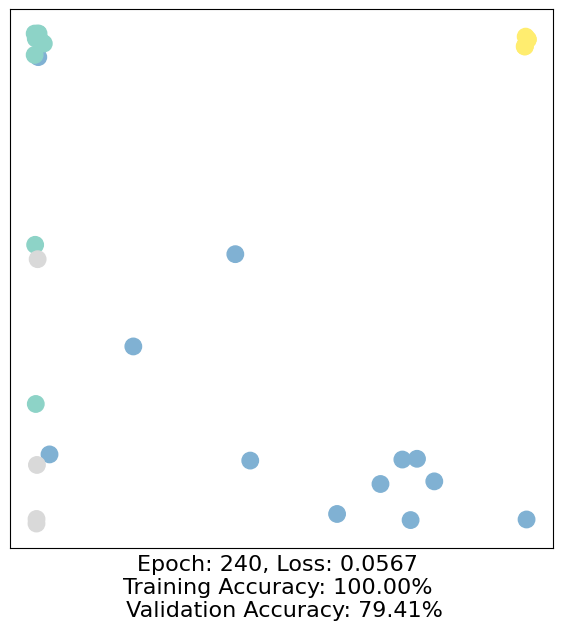

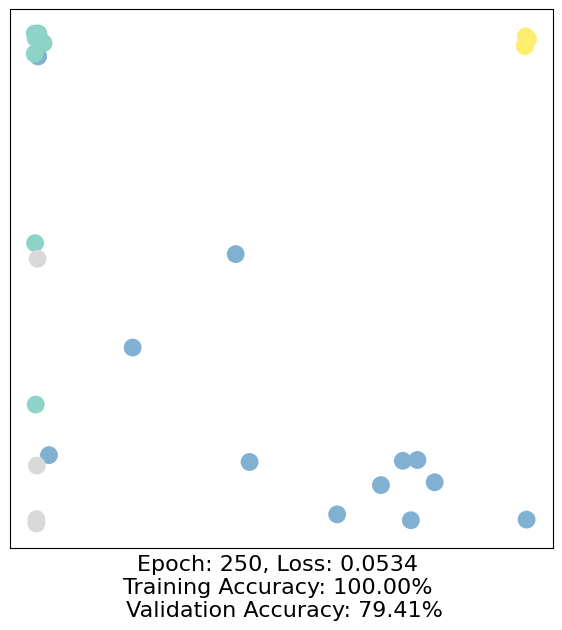

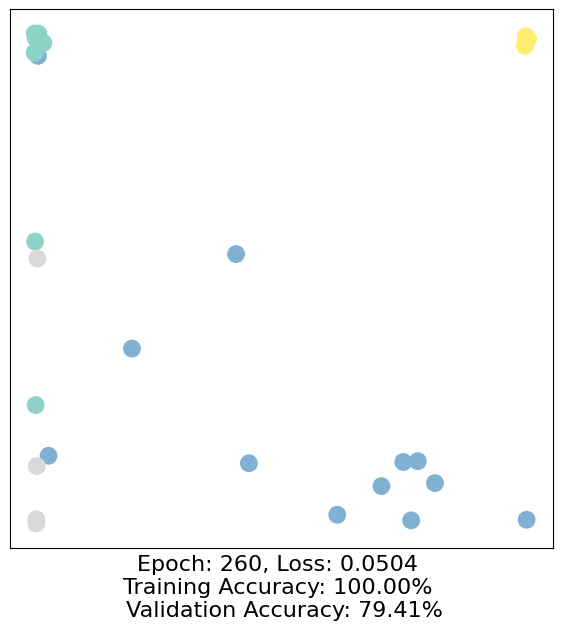

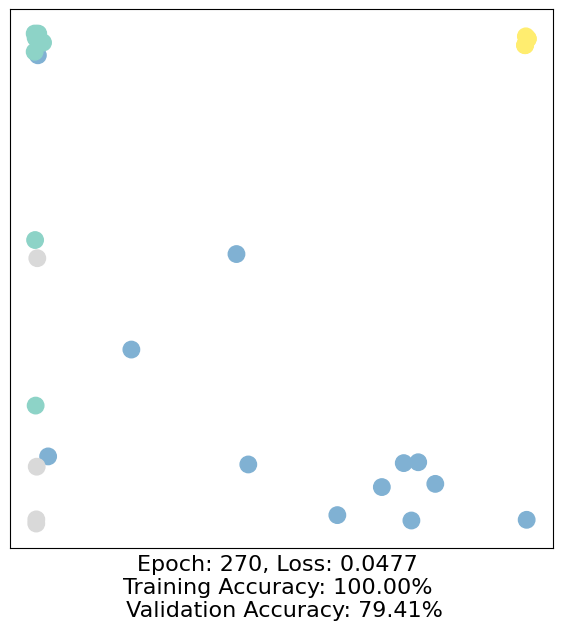

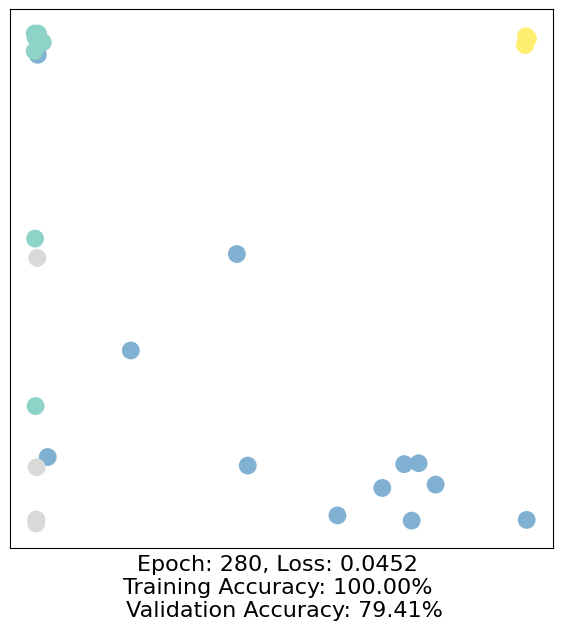

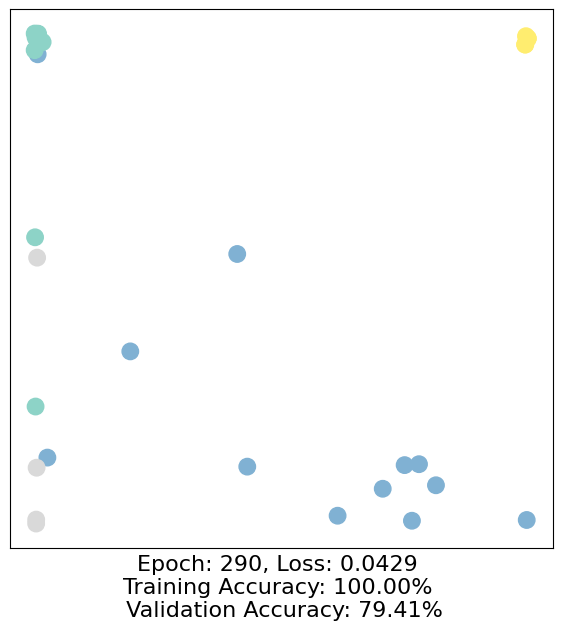

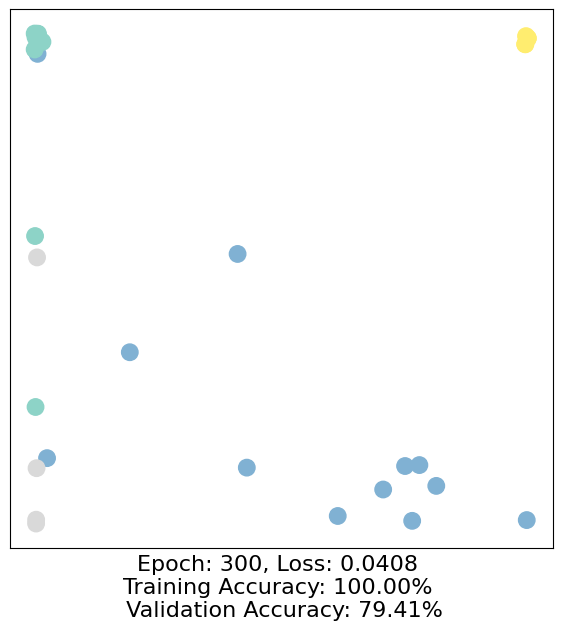

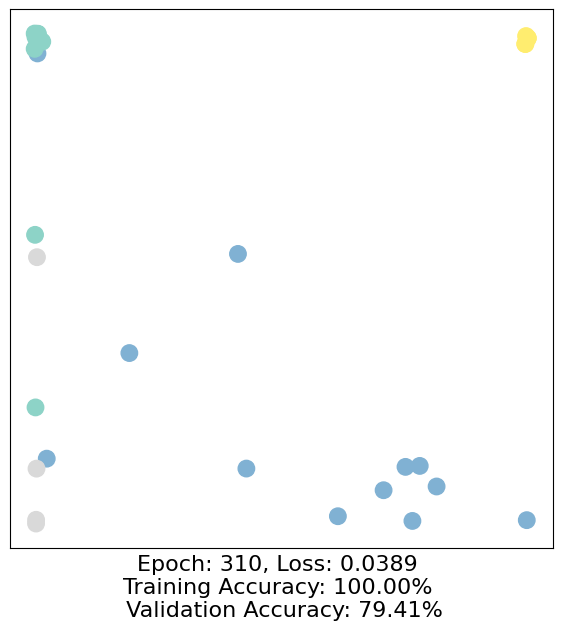

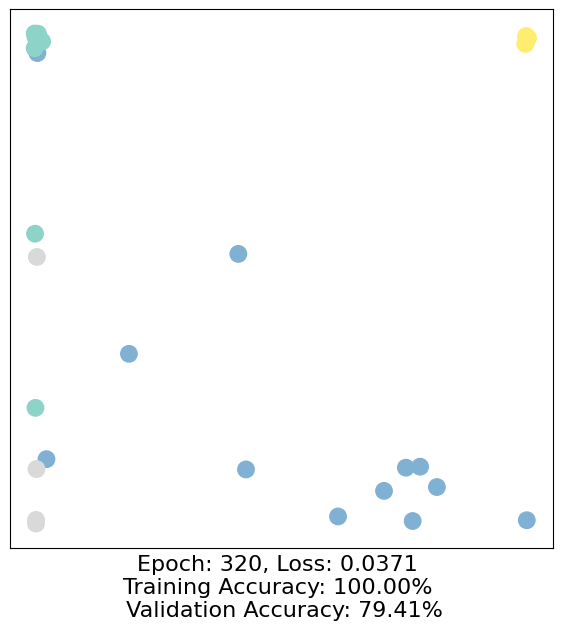

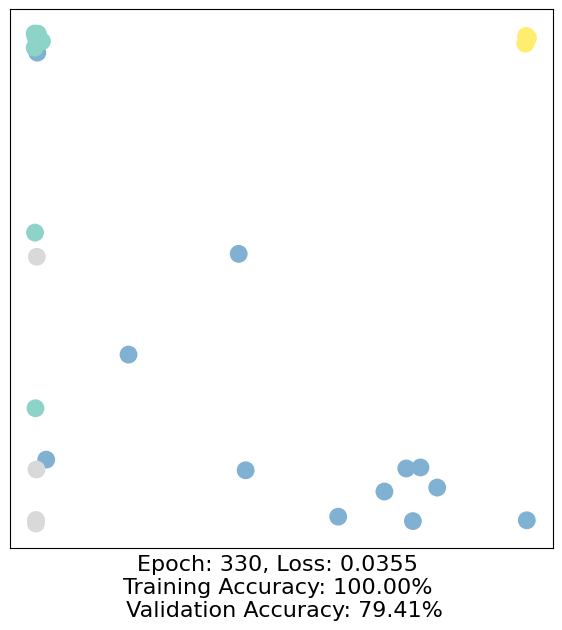

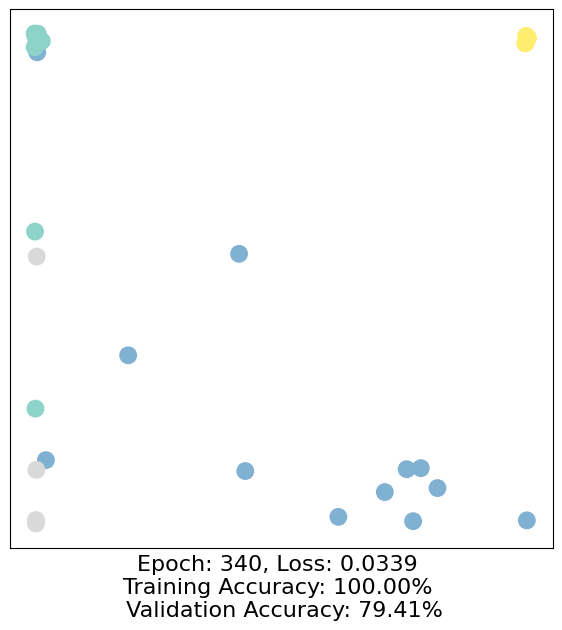

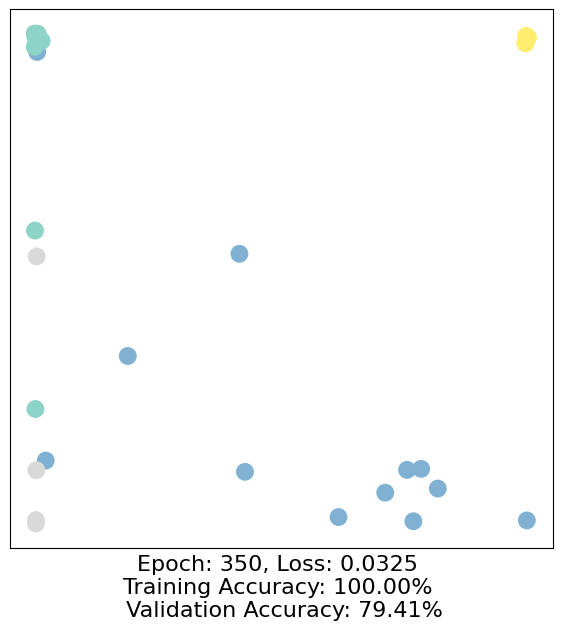

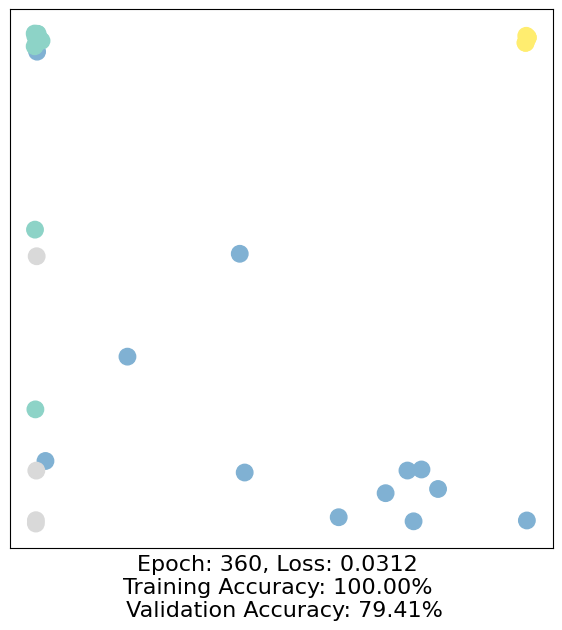

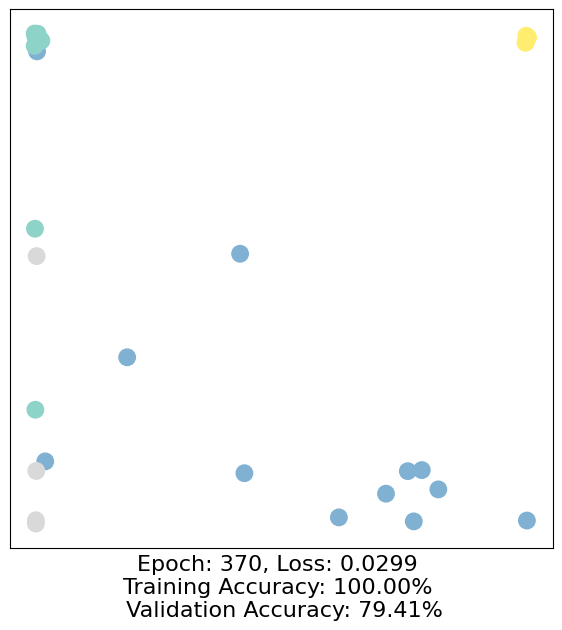

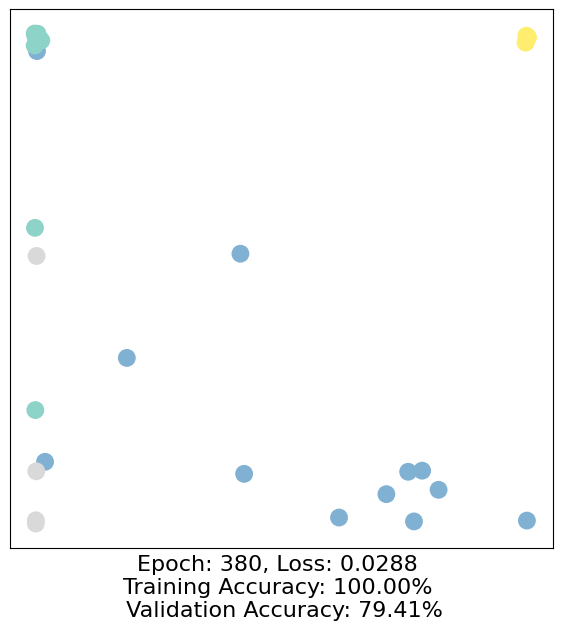

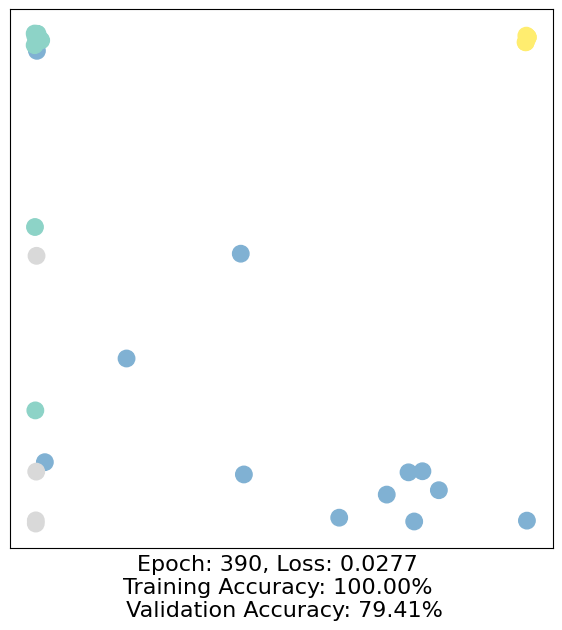

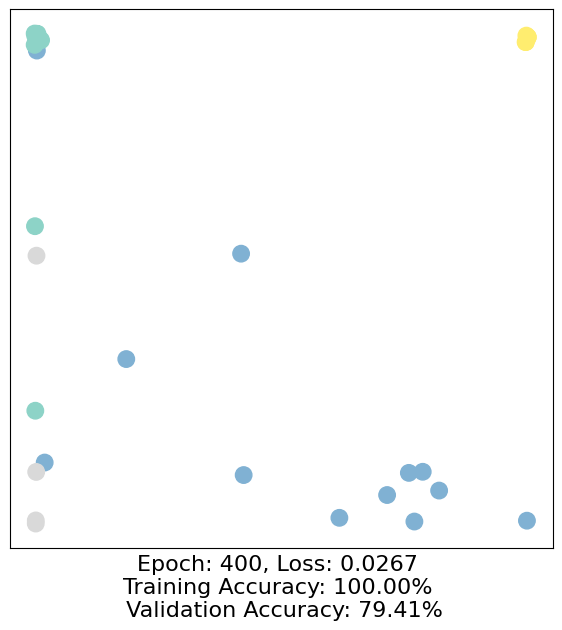

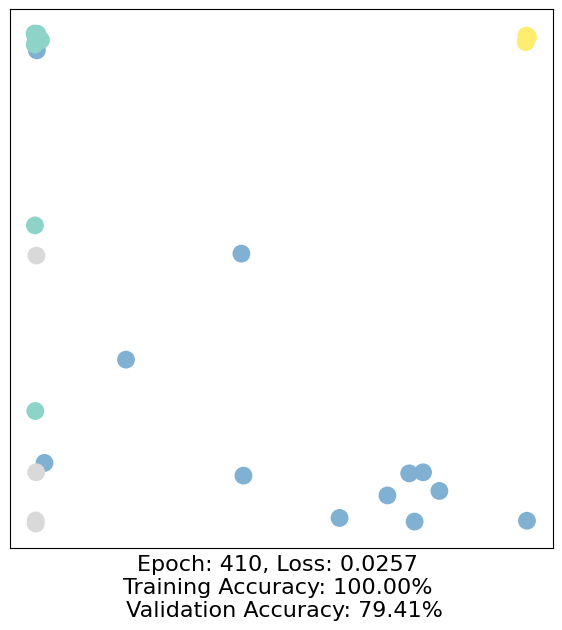

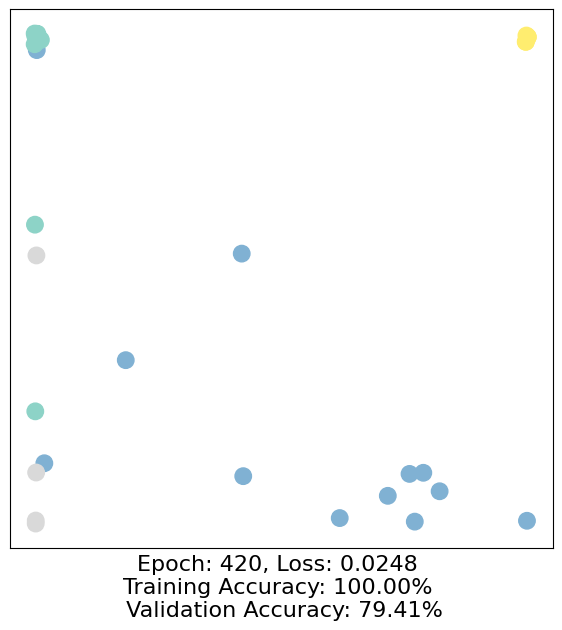

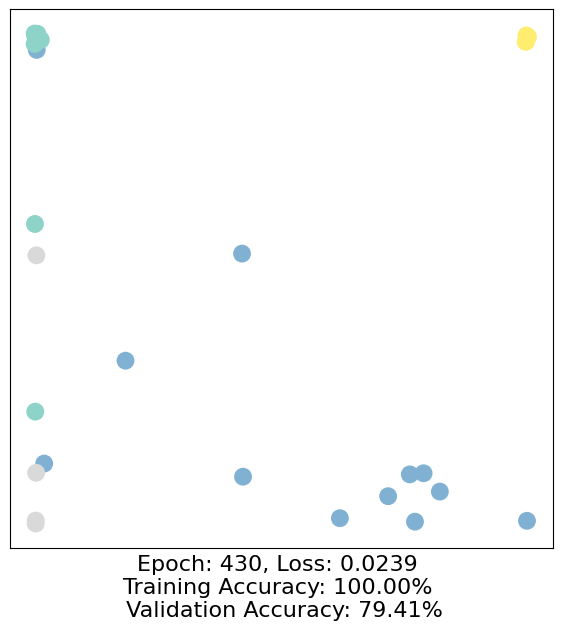

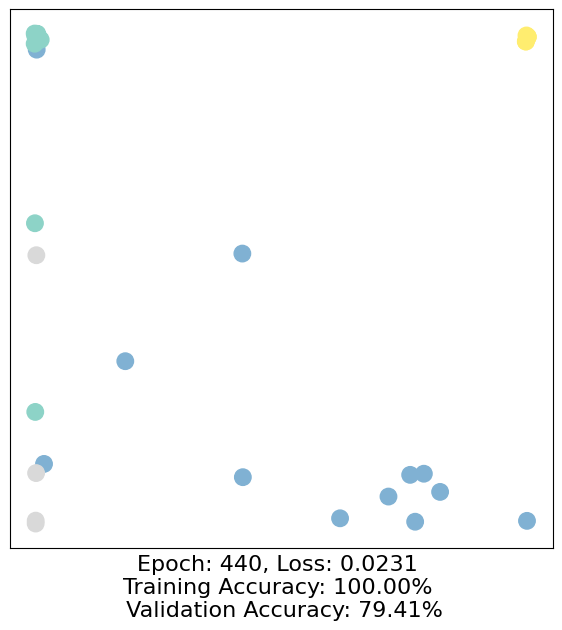

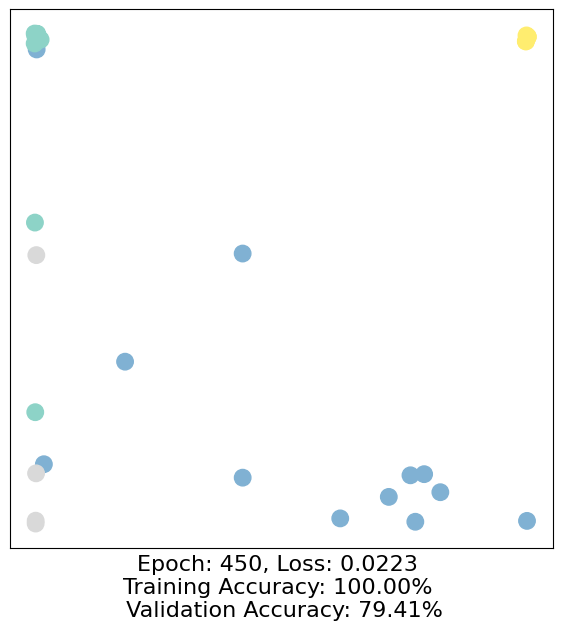

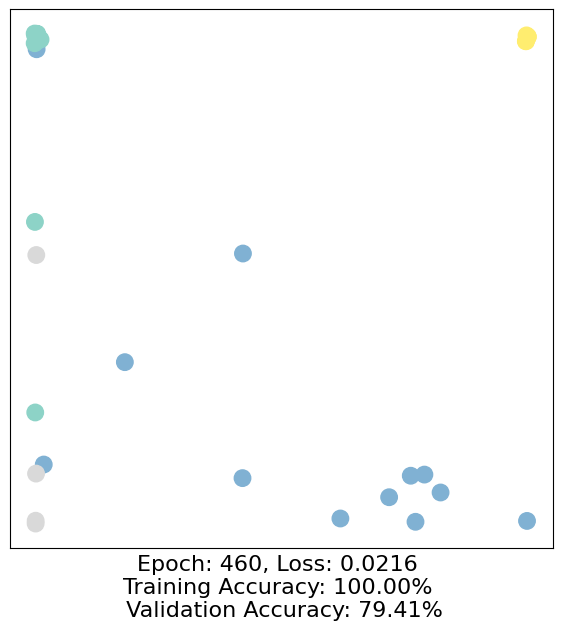

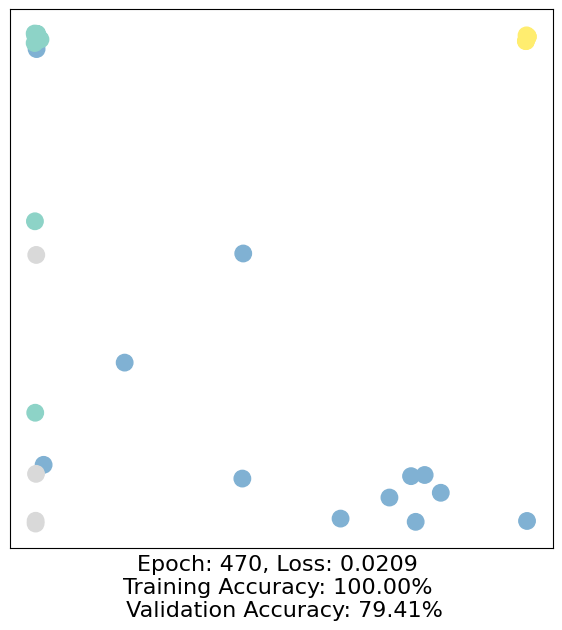

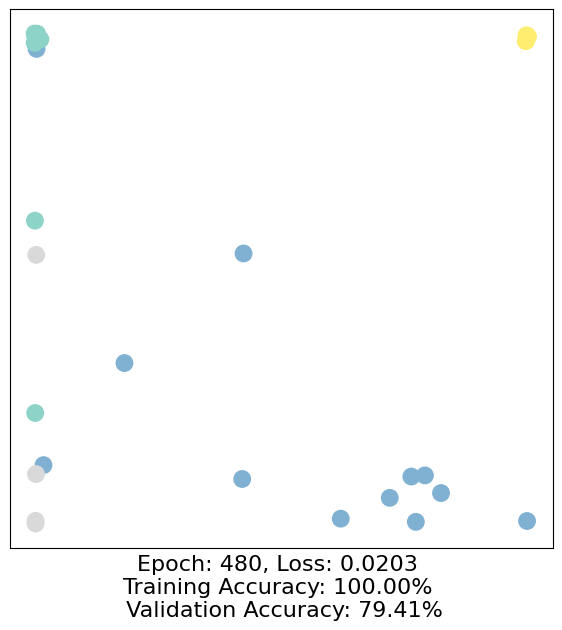

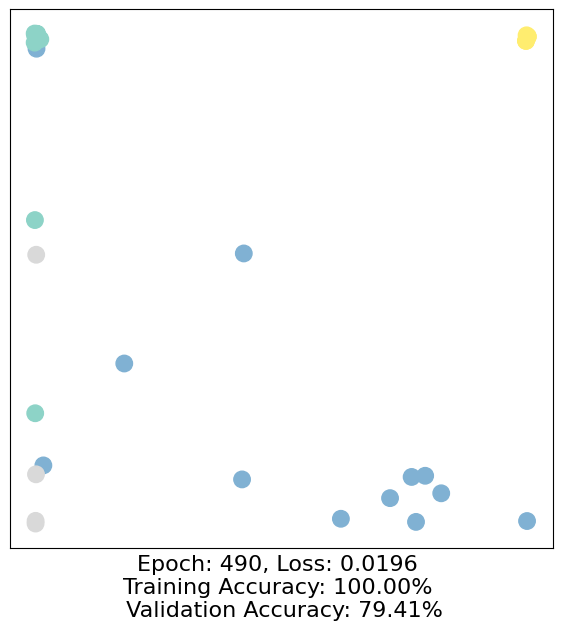

In [11]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.

    accuracy = {}
    # Calculate training accuracy on our four examples
    predicted_classes = torch.argmax(out[data.train_mask], axis=1) # [0.6, 0.2, 0.7, 0.1] -> 2
    target_classes = data.y[data.train_mask]
    accuracy['train'] = torch.mean(
        torch.where(predicted_classes == target_classes, 1, 0).float())

    # Calculate validation accuracy on the whole graph
    predicted_classes = torch.argmax(out, axis=1)
    target_classes = data.y
    accuracy['val'] = torch.mean(
        torch.where(predicted_classes == target_classes, 1, 0).float())

    return loss, h, accuracy

for epoch in range(500):
    loss, h, accuracy = train(data)
    # Visualize the node embeddings every 10 epochs
    if epoch % 10 == 0:
        visualize(h, color=data.y, epoch=epoch, loss=loss, accuracy=accuracy)
        time.sleep(0.3)